<a href="https://colab.research.google.com/github/project-ida/nuclear/blob/matt-sandbox/nuclear-energetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <a href="https://nbviewer.jupyter.org/github/project-ida/nuclear/blob/matt-sandbox/nuclear-energetics.ipynb" target="_parent"><img src="https://nbviewer.jupyter.org/static/img/nav_logo.svg" alt="Open In nbviewer" width="100"/></a>

# Energetics of nuclear reactions

This notebook is about the energy involved in nuclear processes. We take a look at
1. Binding energy
2. Alpha decay

In [83]:
import pandas as pd
pd.set_option('precision', 10)

import matplotlib.pyplot as plt
%matplotlib inline

## Binding energy

Binding energy is the amount of energy you need to put into a nucleus in order to separate it into its constituent protons and neutrons.

There are many places where you can find data about the binding energy for different nuclei - we will look at two of them.

### PNPI - [Petersburg Nuclear Physics Institute](http://dbserv.pnpi.spb.ru/)

A PDF of the binding energy data can be found [here](http://dbserv.pnpi.spb.ru/elbib/tablisot/toi98/www/astro/table2.pdf). We have reformatted the data into a csv file to make it easier to analyse.

In [33]:
# source data http://dbserv.pnpi.spb.ru/elbib/tablisot/toi98/www/astro/table2.pdf
pnpi = pd.read_csv("./data/binding-energies-pnpi.csv",header=7)

In [34]:
pnpi.head()

,A,EL,BE (MeV)
0,1,H,0.0000
1,2,H,2.2245
2,3,H,8.4820
3,3,He,7.7186
4,4,He,28.2970


The PNPI data above contains the following columns of data:
- **A** - Atomic mass number
- **EL** - Element label
- **BE (MeV)** - Binding energy in MeV

It is instructive to calculate the binding energy per nucleon - this gives us a sense of which nuclei are particularly stable.

In [35]:
pnpi["BE/A (MeV)"] = pnpi["BE (MeV)"]/pnpi["A"]

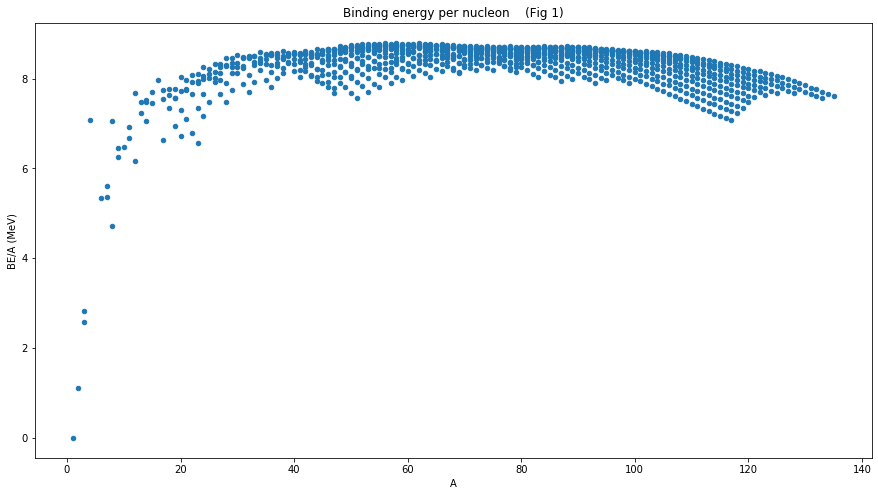

In [36]:
pnpi.plot.scatter(x="A", y="BE/A (MeV)",figsize=(15,8), title="Binding energy per nucleon    (Fig 1)");

The most stable element is the one with maximum binding energy per nucleon - it is Ni-62

In [37]:
most_stable_index = pnpi["BE/A (MeV)"].argmax()
pnpi.loc[most_stable_index]

A                  62
EL                 Ni
BE (MeV)      545.268
BE/A (MeV)    8.79465
Name: 371, dtype: object

The hump shape of Fig 1 indicates that energy can be released from nuclear fusion of light elements and nuclear fission of heavy elements. 

The current data only goes up to atomic mass 135. To go further we need to look at a different dataset

### IAEA nuclear data services - [Atomic Mass Data Center](https://www-nds.iaea.org/amdc/)

A txt file containing the binding energy data can be found [here](https://www-nds.iaea.org/amdc/ame2016/mass16.txt). We have reformatted the data into a csv file to make it easier to analyse and excluded non-experimental values (denoted by # in the original txt file).

In [138]:
# source data https://www-nds.iaea.org/amdc/ame2016/mass16.txt
iaea = pd.read_csv("./data/binding-energies-iaea.csv",header=13)

In [139]:
iaea.head()

,N,Z,A,EL,DEL_M (keV),BE/A (keV),Mass (mu-u)
0,1,0,1,n,8071.31713,0.000,1.0086649160e+06
1,0,1,1,H,7288.97061,0.000,1.0078250320e+06
2,1,1,2,H,13135.72176,1112.283,2.0141017780e+06
3,2,1,3,H,14949.80993,2827.265,3.0160492820e+06
4,1,2,3,He,14931.21793,2572.680,3.0160293230e+06


The IAEA data above contains the following columns of data:
- **N** - Number of neutrons
- **Z** - Number of protons
- **A** - Atomic mass number
- **EL** - Element label
- **DEL_M (keV)** - [Mass excess](https://en.wikipedia.org/wiki/Mass_excess) in keV (technically this should be $keV/c^2$ but the $c^2$ factor is often dropped)
- **BE/A (keV)** - Binding energy per nucleon in keV
- **Mass (mu-u)** - Atomic mass in millionths of a standard atomic mass unit ([Dalton](https://en.wikipedia.org/wiki/Dalton_(unit)))

Let's first renormalise our units from `keV` into `MeV` for energy and from `mu-u` to `u` for mass units. (*n.b. we don't do this in the csv file because of the [precision limitations](https://docs.python.org/3/tutorial/floatingpoint.html) of the resulting floating point numbers*)

In [140]:
iaea["BE/A (keV)"] = iaea["BE/A (keV)"]/1000
iaea["DEL_M (keV)"] = iaea["DEL_M (keV)"]/1000
iaea["Mass (mu-u)"] = iaea["Mass (mu-u)"]/1000000
iaea.rename(columns={'BE/A (keV)': 'BE/A (MeV)', 'DEL_M (keV)': 'DEL_M (MeV)', 'Mass (mu-u)': 'Mass (u)'}, inplace=True)

In [141]:
iaea.head()

,N,Z,A,EL,DEL_M (MeV),BE/A (MeV),Mass (u)
0,1,0,1,n,8.07131713,0.000000,1.008664916
1,0,1,1,H,7.28897061,0.000000,1.007825032
2,1,1,2,H,13.13572176,1.112283,2.014101778
3,2,1,3,H,14.94980993,2.827265,3.016049282
4,1,2,3,He,14.93121793,2.572680,3.016029323


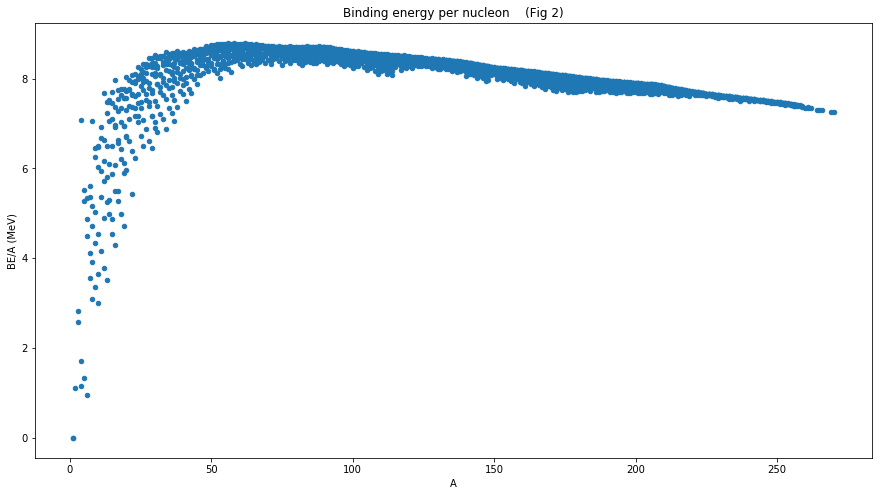

In [142]:
iaea.plot.scatter(x="A", y="BE/A (MeV)",figsize=(15,8), title="Binding energy per nucleon    (Fig 2)");

Fig 2 is much more similar to what we see in text books at school. 

We can also check to see whether the IAEA data agrees with PNPI about the most stable element.

In [143]:
most_stable_index = iaea["BE/A (MeV)"].argmax()
iaea.loc[most_stable_index]

N                       34
Z                       28
A                       62
EL                      Ni
DEL_M (MeV)     -66.746323
BE/A (MeV)        8.794553
Mass (u)       61.92834487
Name: 441, dtype: object

$^{62}Ni$ again - lovely.

We are now going to use the IAEA data to look at the energetics of alpha decay.

## Alpha decay

### What is an alpha particle?

[Alpha decay](https://en.wikipedia.org/wiki/Alpha_decay) is a process that involves an unstable parent nucleus "spitting out" a He-4 nucleus (aka an alpha particle). Let's have a look at the alpha particle and see if we can understand the iaea data for it.

To extract only the alpha particle entry (with N=2 and Z=2) from the iaea table, we can use the [`query`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) function from pandas

In [154]:
alpha = iaea.query("N==2 & Z==2")
alpha

,N,Z,A,EL,DEL_M (MeV),BE/A (MeV),Mass (u)
6,2,2,4,He,2.42491561,7.073915,4.002603254


Although `DEL_M (MeV)`, `BE/A (MeV)` and `Mass (u)` might appear like independent quantities, they are in fact intimately related to each other, let's see how.

Mass is the most familiar to us so we'll start there. We normally think of helium as having a mass of 4, associated with the number of nucleons from which it is made (2 protons and 2 neutrons), but this simple picture is not the whole story. 

In [atomic mass units](https://en.wikipedia.org/wiki/Dalton_(unit%29) `u` (aka Dalton), The mass of helium in is 4.002603254.

Compare this with the mass of 2 protons and 2 neutrons:

In [180]:
proton = iaea.query("N==0 & Z==1")
neutron = iaea.query("N==1 & Z==0")

In [181]:
2*proton["Mass (u)"].values[0] + 2*neutron["Mass (u)"].values[0]

4.0329798960000005

There is a difference between the two values (a [mass defect](https://en.wikipedia.org/wiki/Nuclear_binding_energy#Mass_defect)), the mass of helium is less than the mass of its constituent protons by an amount:

In [196]:
mass_defect = 4.0329798960000005 - 4.002603254
mass_defect

0.03037664200000023

or, energy units $1u = 931.494MeV$,

In [197]:
u = 931.494

In [198]:
mass_defect*u

28.295659763148215

This 28.2957MeV is the energy needed to split the helium apart into its protons and neutrons, i.e. this is the binding energy. Per nucleon this is exactly what appears in the `BE/A (MeV)` column of the iaea table.

In [202]:
alpha_binding_energy = mass_defect*u/4
alpha_binding_energy

7.073914940787054

It is sometimes convenient to think about the mass of a nucleus in terms of how much it deviate from the simple picture given by the number of nucleons. For Heluium this would be:

In [192]:
4.002603254 - 4

0.002603254000000277

or, energy units,

In [193]:
(4.002603254 - 4)*u

2.424915481476258

This 2.4249MeV is called Mass excess and is what appears in the in the `DEL_M (MeV)` column of the iaea table.

### Spontaneous alpha decay 

Alpha decay creates a daughter nucleus with 2 fewer protons and 2 fewer neutrons than the parent. 

Let's look at a real life example. The alpha decay of [uranium-238](https://en.wikipedia.org/wiki/Uranium-238).

In [298]:
U238 = iaea.query("N==146 & Z==92")
U238

,N,Z,A,EL,DEL_M (MeV),BE/A (MeV),Mass (u)
2395,146,92,238,U,47.307783,7.570125,238.050787


Subtracting the alpha nucleus from the U-238 gives us an element with the following number of neutrons and protons:

In [299]:
daughter_NZ = U238[["N","Z"]] - alpha[["N","Z"]].values[0]
daughter_NZ

,N,Z
2395,144,90


What is this element? We need to query the iaea table.

In [300]:
Th234 = iaea.query("N==144 & Z==90")
Th234

,N,Z,A,EL,DEL_M (MeV),BE/A (MeV),Mass (u)
2367,144,90,234,Th,40.613009,7.596855,234.0435999


The alpha decay product of uranium-238 is apparently thorium-234. This decay can (and indeed does) happen spontaneously in nature because of the positive mass difference between the U-238 and the products (Th-234  +alpha). Let's see this explicitly:

In [301]:
mass_defect = U238["Mass (u)"].values[0] - (Th234["Mass (u)"].values[0] + alpha["Mass (u)"].values[0])
mass_defect

0.004583846000002723

U-238 has more mass than the Th-234 + alpha. This mass difference is converted to kinetic energy of the products (with most going to the alpha because it's much lighter than Th).

We can therefore expect that the alpha particle will be released with the following kinetic energy (in MeV):

In [302]:
mass_defect*u

4.269825045926536

This is indeed what is reported (see "Decay modes" in [U-238 wiki entry](https://en.wikipedia.org/wiki/Uranium-238))

### Induced alpha decay

In addition to decay processes that happen spontaneously, we can also imagine exciting nuclei into higher energy states from which they are then energetically able to decay. [Photodisintegration](https://en.wikipedia.org/wiki/Photodisintegration), [Photofission](https://en.wikipedia.org/wiki/Photofission) and [Neutron activation](https://en.wikipedia.org/wiki/Neutron_activation) are examples of such a situation.

Another important example that we'll now look at is the [breeding of tritium from lithium](https://en.wikipedia.org/wiki/Tritium#Lithium).

Most of the lithium in the world is Li-7

In [303]:
Li7 = iaea.query("N==4 & Z==3")
Li7

,N,Z,A,EL,DEL_M (MeV),BE/A (MeV),Mass (u)
16,4,3,7,Li,14.90710529,5.606439,7.016003437


If we are to imagine the possibility of Li-7 undergoing alpha decay then, it's daughter nucleus would have the following numbers of neutrons and protons:

In [304]:
daughter_NZ = Li7[["N","Z"]] - alpha[["N","Z"]].values[0]
daughter_NZ

,N,Z
16,2,1


This daughter element is H-3, otherwise knows as tritium

In [305]:
H3 = iaea.query("N==2 & Z==1")
H3

,N,Z,A,EL,DEL_M (MeV),BE/A (MeV),Mass (u)
3,2,1,3,H,14.94980993,2.827265,3.016049282


However, if we look at the difference in energy (in MeV) between Li-7 and products (i.e H-3 + alpha):

In [306]:
(Li7["Mass (u)"].values[0]  - (H3["Mass (u)"].values[0] + alpha["Mass (u)"].values[0]))*u

-2.4676198239044376

We see that it's negative i.e. spontaneous decay is not energetically possible.

We can however create an excited form of Li-7 by "bombarding" Li-6 with neutrons.

In [307]:
Li6 = iaea.query("N==3 & Z==3")
Li6

,N,Z,A,EL,DEL_M (MeV),BE/A (MeV),Mass (u)
13,3,3,6,Li,14.08687895,5.332331,6.015122887


The energy difference between reactants (Li-6 + n) and products (H-3 + alpha) is then:

In [308]:
( Li6["Mass (u)"].values[0] + neutron["Mass (u)"].values[0] - 
 (H3["Mass (u)"].values[0] + alpha["Mass (u)"].values[0]) )*u

4.783470398898826

So, 4.78MeV of energy is released when we combine Li-6 and a neutron - there is therefore no need to "bombard" the Li-6 with very high energy neutrons, apparently any energy will do.

We can play these kind of energy comparison games for many different scenarios in order to hunt for possible novel reactions. It is helpful to be able to do these comparisons across many elements at once - this is what we will finish with.

### Automation

We are now going to extend some of the code used when looking at the alpha decay of an individual nucleus. This will allow us to analyse all the elements in one go. In a sense we will be gathering together many hypothetical reactions from which we can later select/discard according to energy conservation criteria.

We start as we did before by subtracting the alpha nucleus, but this time from **all** elements in the iaea list. This gives us daughter nuclei with the following number of neutrons and protons:

In [326]:
daughter_NZ = iaea[["N","Z"]] - alpha[["N","Z"]].values[0]

In [327]:
daughter_NZ.head(10)

,N,Z
0,-1,-2
1,-2,-1
2,-1,-1
3,0,-1
4,-1,0
5,1,-1
6,0,0
7,-1,1
8,2,-1
9,1,0


Some of the rows in the above table don't make sense because they are either both zero or contain negative numbers. The first row that does make sense is row number 9.

Although we can tell by eye that the daughter element corresponding the row 9 with N=1 and Z=0 is the neutron, in general we will need to query the iaea table to find this out. This querying is similar to what we did earlier, the only difference is that below we now use [fstrings](https://realpython.com/python-f-strings/) to demonstrate how we go about removing the hard coded numbers.

In [319]:
q = f"N=={daughter_NZ.loc[9]['N']} & Z=={daughter_NZ.loc[9]['Z']}"
q

'N==1 & Z==0'

In [320]:
iaea.query(q)

,N,Z,A,EL,DEL_M (MeV),BE/A (MeV),Mass (u)
0,1,0,1,n,8.07131713,0.0,1.008664916


We are now ready to automate the process of finding the daughter elements (for those that have one).

In [254]:
parent_index = []
daughter_index = []
for i, row in daughter_NZ.iterrows():
    try:
        q = f"N=={row['N']} & Z=={row['Z']}"
        daughter_index.append(iaea.query(q).index[0])
        parent_index.append(i)
    except:
        continue

In [255]:
parents_alpha_decay = iaea.loc[parent_index]
parents_alpha_decay.reset_index(inplace=True, drop=True)

daughters_alpha_decay = iaea.loc[daughter_index]
daughters_alpha_decay.reset_index(inplace=True, drop=True)

In [256]:
parents_alpha_decay.head()

,N,Z,A,EL,DEL_M (MeV),BE/A (MeV),Mass (u)
0,3,2,5,He,11.23123300,5.512132,5.012057224
1,2,3,5,Li,11.67888600,5.266132,5.012537800
2,3,3,6,Li,14.08687895,5.332331,6.015122887
3,4,3,7,Li,14.90710529,5.606439,7.016003437
4,3,4,7,Be,15.76899900,5.371548,7.016928717


In [253]:
daughters_alpha_decay.head()

,N,Z,A,EL,DEL_M (MeV),BE/A (MeV),Mass (u)
0,1,0,1,n,8.07131713,0.000000,1.008664916
1,0,1,1,H,7.28897061,0.000000,1.007825032
2,1,1,2,H,13.13572176,1.112283,2.014101778
3,2,1,3,H,14.94980993,2.827265,3.016049282
4,1,2,3,He,14.93121793,2.572680,3.016029323


The above two tables pair the parents and daughters together. We can now calculate the kinetic energy of the hypothetical decay reactions.

In [336]:
parents_alpha_decay["E_kin (MeV)"] = (parents_alpha_decay["Mass (u)"] - 
                      (daughters_alpha_decay["Mass (u)"] + alpha["Mass (u)"].values[0]))*u

In [343]:
parents_alpha_decay.head(10)

,N,Z,A,EL,DEL_M (MeV),BE/A (MeV),Mass (u),E_kin (MeV)
0,3,2,5,He,11.23123300,5.512132,5.012057224,0.7349990667
1,2,3,5,Li,11.67888600,5.266132,5.012537800,1.9649996339
2,3,3,6,Li,14.08687895,5.332331,6.015122887,-1.4737585746
3,4,3,7,Li,14.90710529,5.606439,7.016003437,-2.4676198239
4,3,4,7,Be,15.76899900,5.371548,7.016928717,-1.5871353668
5,5,3,8,Li,20.94580400,5.159712,8.022486246,-6.1002387007
6,4,4,8,Be,4.94167100,7.062435,8.005305102,0.0918397194
7,3,5,8,B,22.92156700,4.717155,8.024607316,-4.8265361610
8,6,3,9,Li,24.95490200,5.037768,9.026790191,-10.3624571667
9,5,4,9,Be,11.34845300,6.462668,9.012183066,-2.3076944135


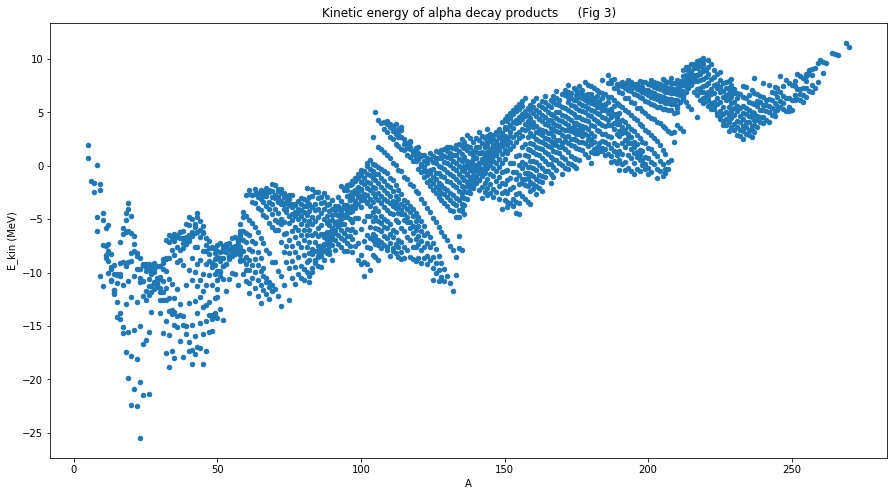

In [339]:
parents_alpha_decay.plot.scatter(x="A", y="E_kin (MeV)",figsize=(15,8), 
                                 title="Kinetic energy of alpha decay products     (Fig 3)");

Fig 3 shows us that on the whole (with the exception of He-5, Li-5 and Be-8) spontaneous alpha decay is only possible when the mass number gets higher than about 100. We can see this explicitly by querying the `parents_alpha_decay` table

In [346]:
parents_alpha_decay.query("`E_kin (MeV)` > 0")

,N,Z,A,EL,DEL_M (MeV),BE/A (MeV),Mass (u),E_kin (MeV)
0,3,2,5,He,11.231233,5.512132,5.012057224,0.7349990667
1,2,3,5,Li,11.678886,5.266132,5.012537800,1.9649996339
6,4,4,8,Be,4.941671,7.062435,8.005305102,0.0918397194
788,52,50,102,Sn,-64.934884,8.324430,101.930289500,0.2765847875
800,53,50,103,Sn,-66.972591,8.341757,102.928102000,0.5336491866
...,...,...,...,...,...,...,...,...
2330,156,108,264,Hs,119.563222,7.298375,264.128356400,10.5907570312
2331,157,108,265,Hs,120.900283,7.296247,265.129791800,10.4703148569
2332,158,108,266,Hs,121.136373,7.298273,266.130045300,10.3457741091
2333,159,110,269,Ds,134.834709,7.250154,269.144751000,11.5094895633


We can also use the query function to pick out some favourite elements, e.g. Palladium and Silver

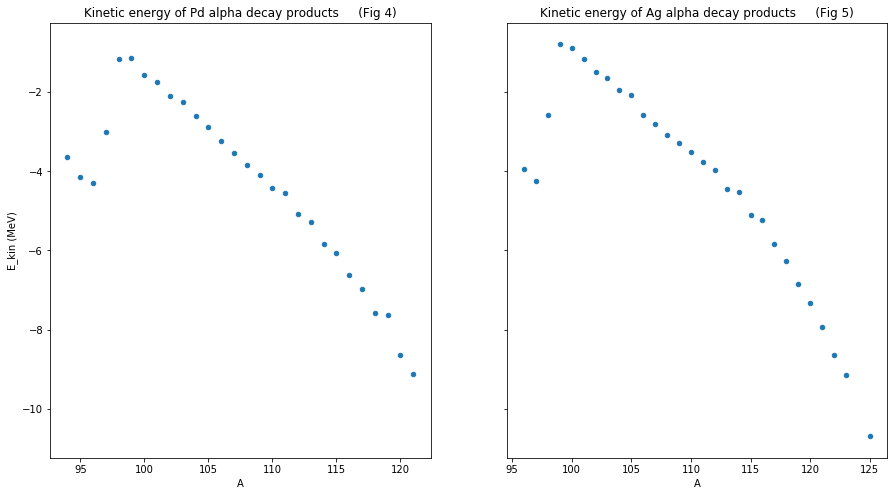

In [369]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8), sharey=True)
parents_alpha_decay.query("EL=='Pd'").plot.scatter(x="A", y="E_kin (MeV)", ax=axes[0],
                                    title="Kinetic energy of Pd alpha decay products     (Fig 4)");
parents_alpha_decay.query("EL=='Ag'").plot.scatter(x="A", y="E_kin (MeV)",ax=axes[1],
                                    title="Kinetic energy of Ag alpha decay products     (Fig 5)");